In [1]:
import pandas as pd
import numpy as np

from scipy.stats import norm
import time

import matplotlib.pyplot as plt

### 10 Assets

In [2]:
mu = 0.01
sigma = 0.10
bars = 1000
num_assets = 10

returns = np.random.normal(mu, sigma, (bars, num_assets))

In [3]:
returns

array([[-0.02060826, -0.06920369,  0.00842753, ...,  0.05727702,
         0.0485731 ,  0.19772812],
       [ 0.06882074,  0.01232837, -0.04117838, ..., -0.12332469,
         0.07797781,  0.1620771 ],
       [-0.27748168,  0.30793816, -0.17099477, ..., -0.01718132,
        -0.18156678, -0.06133961],
       ..., 
       [-0.1783868 ,  0.03776278, -0.13513613, ...,  0.0557206 ,
         0.01463252, -0.01395203],
       [ 0.04994289,  0.03074239,  0.07748446, ..., -0.10270035,
        -0.07861451,  0.03504356],
       [-0.17243748,  0.02263088,  0.06165884, ...,  0.12276933,
         0.02465965,  0.05498837]])

In [8]:
names = ['Asset %s' %i for i in range(num_assets)]

In [9]:
returns = pd.DataFrame(returns, columns=names)

In [10]:
returns

,Asset 0,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9
0,-0.020608,-0.069204,0.008428,-0.010095,-0.041990,-0.174041,0.120516,0.057277,0.048573,0.197728
1,0.068821,0.012328,-0.041178,0.068729,0.142848,0.085030,-0.034925,-0.123325,0.077978,0.162077
2,-0.277482,0.307938,-0.170995,-0.165906,0.116307,0.011176,0.010330,-0.017181,-0.181567,-0.061340
3,-0.002707,0.057609,0.036269,0.025579,0.001768,0.023553,0.025668,0.049803,0.159676,0.019826
4,0.062532,0.100853,0.122466,-0.005228,0.089551,0.002220,0.117620,-0.107566,0.116573,-0.035306
5,0.043998,-0.065949,0.133362,0.185265,0.048365,0.061082,0.216010,-0.026057,-0.137136,0.365601
6,-0.036011,-0.068478,0.041456,-0.034212,0.152911,-0.086093,-0.145202,-0.048143,-0.042831,0.039458
7,0.211733,0.170499,0.004094,-0.113565,0.132250,-0.026434,0.045108,0.165940,0.042423,-0.067011
8,0.014963,0.023464,0.008000,0.010925,-0.000977,-0.012794,0.075332,0.003427,-0.086970,-0.117452
9,0.062642,-0.006677,0.129563,0.035811,-0.208113,0.079640,-0.010600,0.222742,0.149640,0.131054


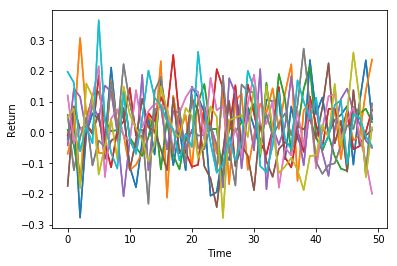

In [12]:
plt.plot(returns.head(50))
plt.xlabel('Time')
plt.ylabel('Return');
plt.show()

In [14]:
weights = np.ones((10,1))

In [16]:
weights = weights / np.sum(weights)

In [21]:
def value_at_risk(value_invested, returns, weights, alpha=0.95, lookback_days=520):
    returns = returns.fillna(0.0)
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    return np.percentile(portfolio_returns, 100 * (1-alpha)) * value_invested

In [22]:
value_invested = 1000000

In [23]:
value_at_risk(value_invested, returns, weights, alpha=0.95)

-40990.441405277823

In [26]:
returns.iloc[-520:].dot(weights)

,0
480,0.004951
481,-0.007709
482,-0.030561
483,-0.022727
484,0.016806
485,-0.017465
486,-0.000877
487,0.003730
488,-0.005085
489,0.043992
